## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: 'Bar 8695'


In [2]:
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re


## Part 2 - Experiments
You could add as many code cells as needed

In [3]:

train_filename = 'titanic_train.csv'
test_filename  = 'titanic_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [4]:
def remove_corrupt_rows(df):
    res1=df.dropna()
    return res1

In [5]:
def count_duplicatives(df, col_name=None):
    res = df.duplicated(keep='first').sum()
    # print(df.duplicated(keep="first").count())
    if col_name:
        res = df[col_name].duplicated(keep='first').sum()

    return (res)


In [6]:
def remove_duplicatives(df, col_name=None):
    res_df=df.drop_duplicates(keep='first')
    if col_name:
        res_df=df.drop_duplicates(subset=col_name,keep='first')
    return res_df

In [7]:

df_test.head(5)
df_train.head(5)

df_test.shape
df_train.shape


df_test.info()
df_train.info()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000,0,0,7.050,0,0
1,3,1,30.000,0,0,7.250,0,0
2,3,1,29.699,0,0,14.500,0,0
3,3,0,21.000,0,0,7.750,2,0
4,3,1,32.000,0,0,56.496,0,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.000,1,0,78.267,1,1
1,2,0,45.000,0,0,13.500,0,1
2,3,1,20.000,0,0,9.500,0,0
3,3,1,36.000,0,0,7.896,0,0
4,3,1,22.000,0,0,8.050,0,0


(179, 8)

(712, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  
 7   Survived  179 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 11.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  


In [8]:
df3=remove_corrupt_rows(df_train)

df3.shape


(712, 8)

In [9]:
res_dup= count_duplicatives(df_train, col_name=None)
print(res_dup)

80


In [10]:
df_train_eng=remove_duplicatives(df_train, col_name=None)
df_train_eng.shape
df_train.shape


(632, 8)

(712, 8)

In [11]:
df_train1=df_train.loc[df_train['Survived'] == 0]
df_train1.shape
df_train1=df_train.loc[df_train['Survived'] == 1]
df_train1.shape

(431, 8)

(281, 8)

In [12]:
cor_df=df_train_eng
cor=cor_df.corr(method='pearson')
print(cor)

          Pclass    Sex    Age  SibSp  Parch   Fare  Embarked  Survived
Pclass     1.000  0.109 -0.323  0.109  0.070 -0.543     0.016    -0.323
Sex        0.109  1.000  0.098 -0.077 -0.239 -0.173    -0.104    -0.515
Age       -0.323  0.098  1.000 -0.301 -0.210  0.071     0.036    -0.081
SibSp      0.109 -0.077 -0.301  1.000  0.392  0.113    -0.037    -0.045
Parch      0.070 -0.239 -0.210  0.392  1.000  0.129    -0.070     0.058
Fare      -0.543 -0.173  0.071  0.113  0.129  1.000     0.098     0.255
Embarked   0.016 -0.104  0.036 -0.037 -0.070  0.098     1.000     0.073
Survived  -0.323 -0.515 -0.081 -0.045  0.058  0.255     0.073     1.000


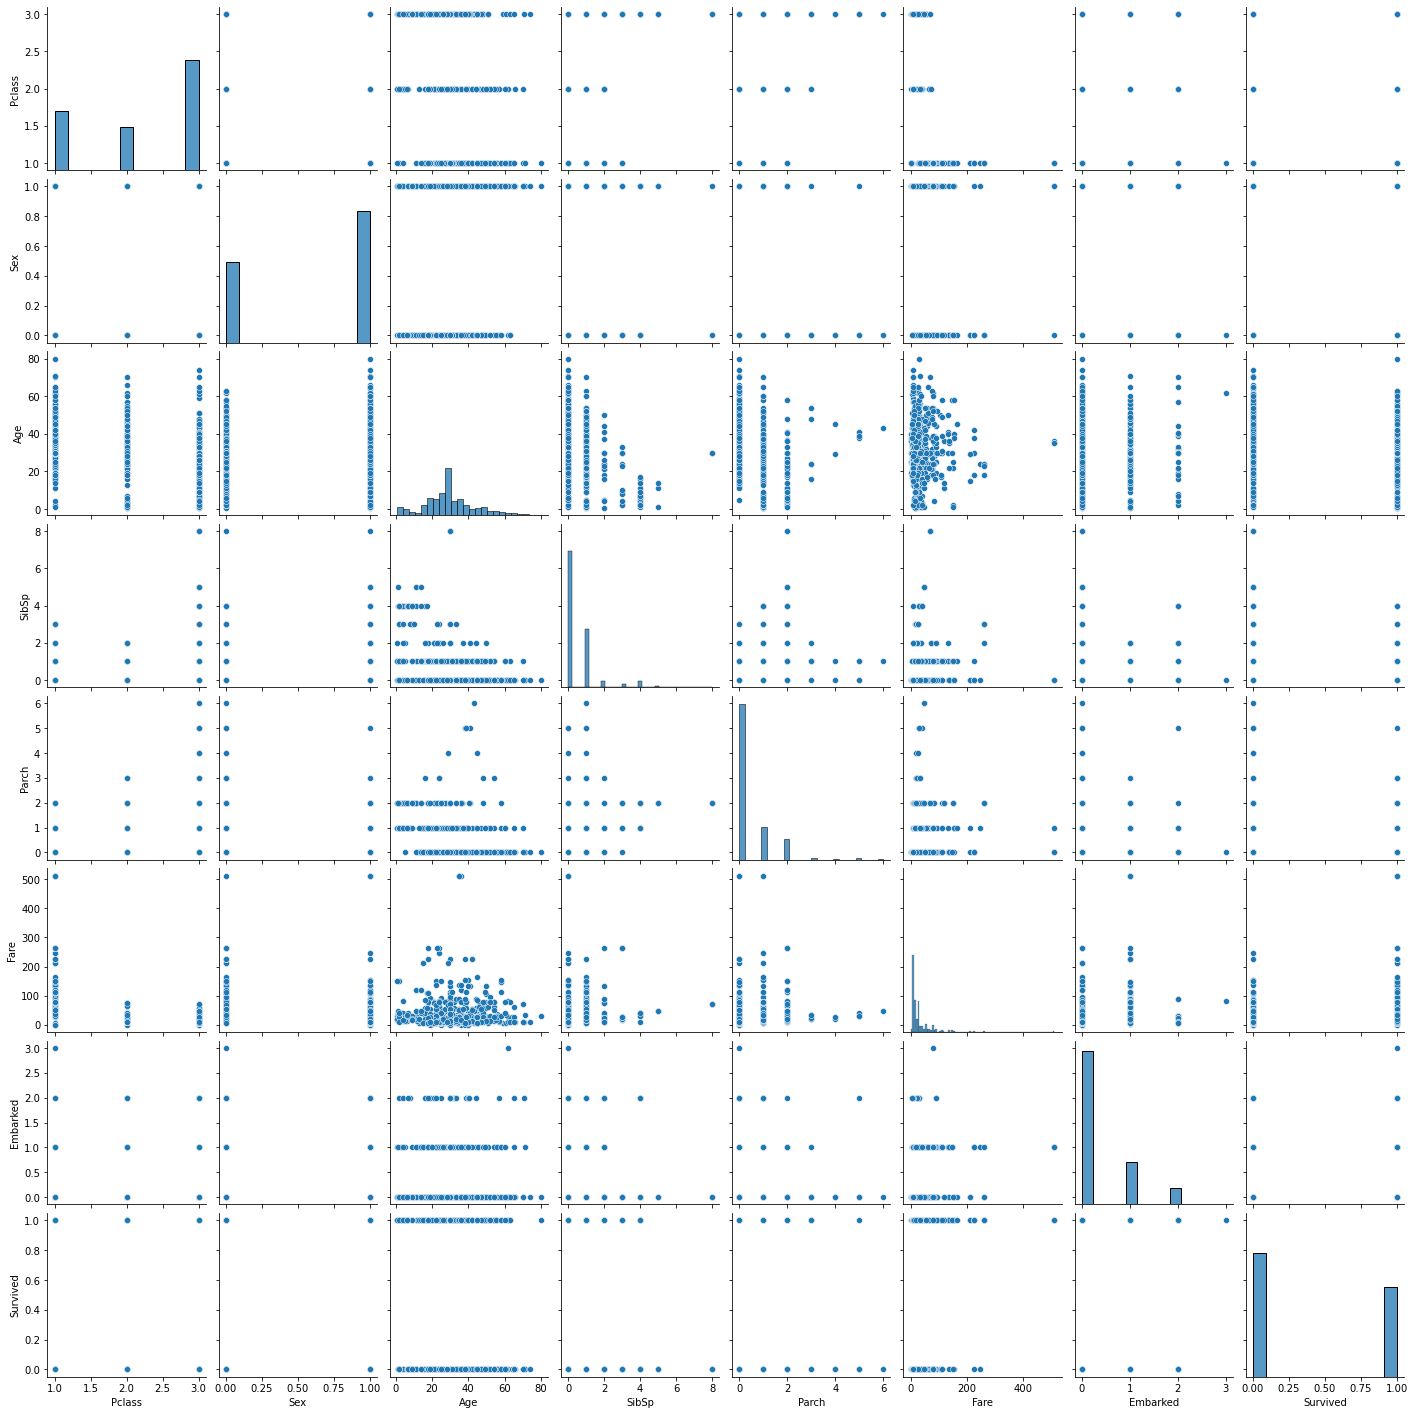

In [13]:
sns.pairplot(df_train_eng)

(array([[305.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  86.],
        [ 62.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 179.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

([<matplotlib.axis.XTick at 0x2014fd75730>,
 [Text(1, 0, 'Survived'), Text(0, 0, 'Didnt survive')])

Text(0.5, 1.0, 'Connection between Gender and Survival')

Text(0.5, 0, 'Survival')

Text(0, 0.5, 'Passangers')

Female Passengers: 241
Male Passengers: 391
Female Passengers survived: 179
Female Passengers didnt survive: 62
male Passengers survived: 86
male Passengers didnt survive: 305


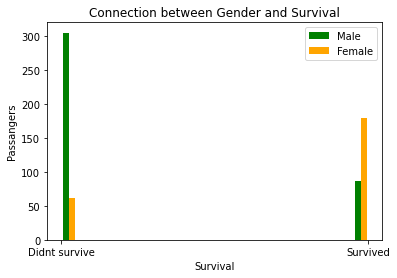

In [14]:
Male_df=df_train_eng.loc[df_train_eng['Sex']==1]

feMale_df=df_train_eng.loc[df_train_eng['Sex']==0]

Male_s=Male_df.loc[Male_df['Survived']==1]

Male_d=Male_df.loc[Male_df['Survived']==0]

Female_s=feMale_df.loc[feMale_df['Survived']==1]

Female_d=feMale_df.loc[feMale_df['Survived']==0]



survived_df=df_train.loc[df_train['Survived'] == 1]
plt.hist([Male_df["Survived"],feMale_df["Survived"]],bins=20,color=['green','orange'],label=['Male','Female'])
plt.legend(loc='upper right')
plt.xticks([1,0],["Survived","Didnt survive"])

plt.title('Connection between Gender and Survival')
plt.xlabel('Survival')
plt.ylabel('Passangers')


print('Female Passengers:',feMale_df.count().Sex)
print('Male Passengers:',Male_df.count().Sex)

print('Female Passengers survived:',Female_s.count().Sex)
print('Female Passengers didnt survive:',Female_d.count().Sex)

print('male Passengers survived:',Male_s.count().Sex)
print('male Passengers didnt survive:',Male_d.count().Sex)

<AxesSubplot:title={'center':'The connection between Survived to Fare'}, xlabel='Fare', ylabel='Survived'>

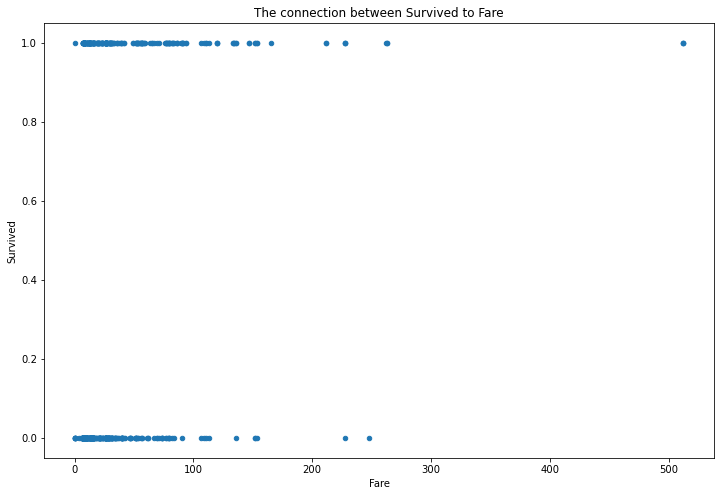

In [15]:
df_train_eng.plot.scatter('Fare','Survived',figsize=(12,8),title='The connection between Survived to Fare')


In [16]:
df_train_eng2=df_train_eng[df_train_eng['Fare']<400]
df_train_eng.shape
df_train_eng2.shape


(632, 8)

(629, 8)

In [17]:
X = df_train.drop("Survived",axis=1)
X2 = df_train_eng.drop("Survived",axis=1) #Without Duplicates
X3 = df_train_eng2.drop("Survived",axis=1)#Without Duplicates and Fair Outliers

y = df_train.Survived
y2 = df_train_eng.Survived   #Without Duplicates
y3 = df_train_eng2.Survived #Without Duplicates and Fair Outliers

#X_test=df_test.drop("Survived",axis=1)

In [18]:
#Support Vector Machine  

SVCmodel = SVC()

param_grid_svc = {
    'C': [0.1, 1, 10, 100],    #Regularization parameter.
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']#Kernel coefficient for 'rbf'
}
grid_search = GridSearchCV(estimator=SVCmodel, param_grid=param_grid_svc, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X)
y_test = y
print(classification_report(y_test, y_pred))

grid_search.fit(X2, y2)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X2)
y_test = y2
print(classification_report(y_test, y_pred))


grid_search.fit(X3, y3)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X3)
y_test = y3
print(classification_report(y_test, y_pred))


#y_pred = grid_search.predict(X_test)
#y_test = df_test.Survived

# Print classification report
#print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024,0.001,0.010,0.000,0.100,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.601,0.608,0.606,0.606,0.606,0.605,0.002,15
1,0.018,0.001,0.009,0.000,0.100,0.100,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.601,0.608,0.606,0.606,0.606,0.605,0.002,15
2,0.016,0.000,0.008,0.000,0.100,0.010,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.608,0.643,0.655,0.620,0.634,0.632,0.017,12
3,0.015,0.000,0.008,0.000,0.100,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.664,0.678,0.676,0.690,0.620,0.666,0.024,10
4,0.025,0.001,0.011,0.000,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.643,0.650,0.641,0.620,0.648,0.640,0.011,11
5,0.018,0.000,0.009,0.000,1,0.100,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.608,0.734,0.669,0.690,0.690,0.678,0.041,8
6,0.016,0.001,0.007,0.000,1,0.010,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.643,0.748,0.683,0.725,0.690,0.698,0.036,5
7,0.016,0.001,0.007,0.000,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.699,0.692,0.676,0.697,0.641,0.681,0.022,7
8,0.026,0.001,0.010,0.000,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.650,0.636,0.599,0.613,0.655,0.631,0.022,13
9,0.023,0.002,0.008,0.000,10,0.100,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.671,0.727,0.704,0.690,0.669,0.692,0.022,6


Best parameters found: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best accuracy: 0.7878952033881611
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       431
           1       0.80      0.75      0.77       281

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021,0.001,0.009,0.000,0.100,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.583,0.583,0.579,0.579,0.579,0.581,0.002,12
1,0.015,0.000,0.008,0.000,0.100,0.100,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.583,0.583,0.579,0.579,0.579,0.581,0.002,12
2,0.014,0.001,0.007,0.000,0.100,0.010,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.591,0.622,0.619,0.603,0.603,0.608,0.012,11
3,0.014,0.001,0.007,0.000,0.100,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.661,0.654,0.635,0.683,0.595,0.646,0.029,9
4,0.022,0.001,0.009,0.000,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.583,0.591,0.587,0.548,0.563,0.574,0.016,14
5,0.016,0.000,0.007,0.000,1,0.100,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.614,0.677,0.667,0.635,0.667,0.652,0.024,8
6,0.014,0.001,0.006,0.000,1,0.010,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.654,0.740,0.659,0.714,0.667,0.687,0.034,5
7,0.013,0.000,0.006,0.000,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.677,0.661,0.643,0.698,0.611,0.658,0.030,6
8,0.023,0.001,0.009,0.000,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.591,0.591,0.556,0.540,0.563,0.568,0.020,15
9,0.020,0.001,0.007,0.001,10,0.100,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.654,0.677,0.667,0.659,0.619,0.655,0.020,7


Best parameters found: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best accuracy: 0.7673665791776028
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       367
           1       0.80      0.74      0.77       265

    accuracy                           0.81       632
   macro avg       0.81      0.80      0.80       632
weighted avg       0.81      0.81      0.81       632

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022,0.001,0.010,0.001,0.100,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.579,0.579,0.587,0.587,0.584,0.583,0.004,12
1,0.016,0.000,0.008,0.001,0.100,0.100,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.579,0.579,0.587,0.587,0.584,0.583,0.004,12
2,0.014,0.001,0.007,0.000,0.100,0.010,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.595,0.627,0.643,0.619,0.600,0.617,0.018,11
3,0.013,0.000,0.006,0.000,0.100,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.651,0.643,0.659,0.675,0.608,0.647,0.022,9
4,0.021,0.001,0.009,0.000,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.579,0.587,0.611,0.556,0.568,0.580,0.019,14
5,0.016,0.001,0.007,0.000,1,0.100,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.619,0.683,0.683,0.651,0.672,0.661,0.024,6
6,0.014,0.000,0.007,0.000,1,0.010,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.651,0.722,0.675,0.706,0.664,0.684,0.027,5
7,0.014,0.000,0.007,0.000,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.675,0.659,0.659,0.690,0.616,0.660,0.025,7
8,0.023,0.001,0.010,0.000,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.587,0.579,0.587,0.540,0.568,0.572,0.018,15
9,0.020,0.001,0.007,0.001,10,0.100,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.651,0.659,0.675,0.659,0.624,0.653,0.017,8


Best parameters found: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best accuracy: 0.7694476190476189
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       367
           1       0.79      0.74      0.76       262

    accuracy                           0.81       629
   macro avg       0.81      0.80      0.80       629
weighted avg       0.81      0.81      0.81       629



In [19]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier
KNNmodel = KNeighborsClassifier()

# Define the parameter grid to search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],#The main parameter of KNN
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] #The distance metric
}
grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X)
y_test = y
print(classification_report(y_test, y_pred))

grid_search.fit(X2, y2)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X2)
y_test = y2
print(classification_report(y_test, y_pred))


grid_search.fit(X3, y3)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X3)
y_test = y3
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, wei

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003,0.001,0.007,0.001,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.685,0.727,0.648,0.648,0.754,0.692,0.042,12
1,0.003,0.000,0.002,0.000,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.685,0.748,0.641,0.648,0.704,0.685,0.039,14
2,0.003,0.000,0.006,0.000,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.643,0.706,0.662,0.641,0.690,0.669,0.026,16
3,0.003,0.001,0.002,0.000,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.671,0.755,0.648,0.648,0.690,0.682,0.040,15
4,0.003,0.000,0.006,0.000,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.657,0.720,0.711,0.711,0.711,0.702,0.023,9
5,0.003,0.000,0.003,0.001,euclidean,7,distance,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.671,0.755,0.697,0.669,0.690,0.697,0.031,10
6,0.003,0.000,0.006,0.000,euclidean,9,uniform,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.678,0.699,0.704,0.704,0.669,0.691,0.015,13
7,0.003,0.000,0.002,0.000,euclidean,9,distance,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.678,0.727,0.683,0.704,0.676,0.694,0.019,11
8,0.003,0.000,0.007,0.000,manhattan,3,uniform,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.713,0.727,0.676,0.711,0.796,0.725,0.039,3
9,0.003,0.000,0.002,0.000,manhattan,3,distance,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.713,0.748,0.676,0.704,0.732,0.715,0.025,7


Best parameters found: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best accuracy: 0.7318329557766178
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       431
           1       0.79      0.67      0.72       281

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.79       712

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004,0.000,0.006,0.001,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.669,0.661,0.635,0.619,0.690,0.655,0.025,11
1,0.003,0.001,0.002,0.000,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.630,0.685,0.603,0.619,0.627,0.633,0.028,15
2,0.003,0.000,0.006,0.001,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.669,0.677,0.667,0.619,0.627,0.652,0.024,12
3,0.003,0.000,0.002,0.000,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.630,0.685,0.627,0.611,0.611,0.633,0.027,15
4,0.003,0.001,0.006,0.000,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.661,0.669,0.690,0.659,0.635,0.663,0.018,9
5,0.003,0.000,0.002,0.000,euclidean,7,distance,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.630,0.669,0.675,0.627,0.619,0.644,0.023,13
6,0.003,0.000,0.006,0.000,euclidean,9,uniform,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.646,0.646,0.667,0.690,0.627,0.655,0.022,10
7,0.003,0.001,0.003,0.000,euclidean,9,distance,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.630,0.654,0.643,0.659,0.619,0.641,0.015,14
8,0.003,0.000,0.006,0.001,manhattan,3,uniform,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.709,0.685,0.683,0.675,0.762,0.703,0.032,1
9,0.003,0.000,0.002,0.000,manhattan,3,distance,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.669,0.693,0.651,0.659,0.675,0.669,0.014,8


Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy: 0.7025496812898387
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       367
           1       0.81      0.76      0.78       265

    accuracy                           0.82       632
   macro avg       0.82      0.82      0.82       632
weighted avg       0.82      0.82      0.82       632

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002,0.000,0.006,0.001,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.667,0.667,0.659,0.619,0.704,0.663,0.027,9
1,0.003,0.001,0.002,0.000,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.627,0.690,0.627,0.619,0.632,0.639,0.026,15
2,0.003,0.000,0.005,0.000,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.667,0.659,0.683,0.635,0.640,0.657,0.017,11
3,0.002,0.000,0.002,0.000,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.627,0.667,0.635,0.619,0.624,0.634,0.017,16
4,0.003,0.001,0.005,0.000,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.651,0.651,0.675,0.667,0.648,0.658,0.011,10
5,0.003,0.000,0.003,0.000,euclidean,7,distance,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.627,0.651,0.675,0.635,0.632,0.644,0.017,13
6,0.003,0.001,0.006,0.001,euclidean,9,uniform,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.643,0.635,0.683,0.683,0.632,0.655,0.023,12
7,0.003,0.000,0.003,0.001,euclidean,9,distance,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.627,0.643,0.667,0.659,0.624,0.644,0.017,14
8,0.003,0.000,0.006,0.001,manhattan,3,uniform,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.706,0.659,0.698,0.675,0.776,0.703,0.040,1
9,0.004,0.001,0.003,0.000,manhattan,3,distance,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.667,0.667,0.667,0.659,0.680,0.668,0.007,8


Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy: 0.7028190476190476
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       367
           1       0.81      0.76      0.78       262

    accuracy                           0.83       629
   macro avg       0.82      0.82      0.82       629
weighted avg       0.82      0.83      0.82       629



In [20]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression
LogRegmodel = LogisticRegression()

# Define the parameter grid to search
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'] #Algorithm to use in the optimization problem.
                #'newton-cg', 'lbfgs': Suitable for large datasets.
                                    
                #'liblinear': Good for small datasets and supports L1 regularization.
}

# Set up the grid search
grid_search = GridSearchCV(estimator=LogRegmodel, param_grid=param_grid_logreg, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X)
y_test = y
print(classification_report(y_test, y_pred))

grid_search.fit(X2, y2)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X2)
y_test = y2
print(classification_report(y_test, y_pred))


grid_search.fit(X3, y3)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X3)
y_test = y3
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019,0.002,0.001,0.000,0.100,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.790,0.832,0.754,0.831,0.803,0.802,0.029,1
1,0.030,0.003,0.001,0.000,0.100,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.790,0.832,0.754,0.831,0.803,0.802,0.029,1
2,0.003,0.000,0.001,0.000,0.100,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.790,0.811,0.768,0.831,0.803,0.801,0.021,6
3,0.023,0.002,0.002,0.000,1,newton-cg,"{'C': 1, 'solver': 'newton-cg'}",0.797,0.825,0.761,0.831,0.796,0.802,0.025,1
4,0.026,0.002,0.001,0.000,1,lbfgs,"{'C': 1, 'solver': 'lbfgs'}",0.797,0.825,0.761,0.831,0.796,0.802,0.025,1
5,0.004,0.000,0.001,0.000,1,liblinear,"{'C': 1, 'solver': 'liblinear'}",0.790,0.818,0.754,0.838,0.796,0.799,0.028,8
6,0.023,0.002,0.001,0.000,10,newton-cg,"{'C': 10, 'solver': 'newton-cg'}",0.804,0.811,0.761,0.831,0.796,0.801,0.023,7
7,0.029,0.001,0.002,0.000,10,lbfgs,"{'C': 10, 'solver': 'lbfgs'}",0.797,0.811,0.761,0.831,0.796,0.799,0.023,8
8,0.003,0.000,0.002,0.000,10,liblinear,"{'C': 10, 'solver': 'liblinear'}",0.804,0.825,0.754,0.831,0.796,0.802,0.027,5
9,0.024,0.003,0.002,0.000,100,newton-cg,"{'C': 100, 'solver': 'newton-cg'}",0.797,0.811,0.761,0.831,0.796,0.799,0.023,8


Best parameters found: {'C': 0.1, 'solver': 'newton-cg'}
Best accuracy: 0.8019403132079189
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       431
           1       0.78      0.69      0.73       281

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ..........................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028,0.016,0.002,0.000,0.100,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.795,0.780,0.754,0.810,0.762,0.780,0.021,1
1,0.024,0.001,0.002,0.000,0.100,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.795,0.780,0.754,0.810,0.762,0.780,0.021,1
2,0.003,0.000,0.001,0.000,0.100,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.780,0.748,0.762,0.802,0.746,0.767,0.021,12
3,0.021,0.002,0.002,0.000,1,newton-cg,"{'C': 1, 'solver': 'newton-cg'}",0.787,0.764,0.754,0.802,0.754,0.772,0.019,6
4,0.025,0.001,0.001,0.000,1,lbfgs,"{'C': 1, 'solver': 'lbfgs'}",0.787,0.764,0.754,0.802,0.754,0.772,0.019,6
5,0.003,0.001,0.001,0.000,1,liblinear,"{'C': 1, 'solver': 'liblinear'}",0.772,0.780,0.762,0.810,0.746,0.774,0.021,5
6,0.022,0.001,0.002,0.000,10,newton-cg,"{'C': 10, 'solver': 'newton-cg'}",0.787,0.764,0.754,0.802,0.754,0.772,0.019,6
7,0.024,0.002,0.001,0.000,10,lbfgs,"{'C': 10, 'solver': 'lbfgs'}",0.787,0.764,0.770,0.802,0.754,0.775,0.017,4
8,0.003,0.000,0.001,0.000,10,liblinear,"{'C': 10, 'solver': 'liblinear'}",0.795,0.764,0.762,0.802,0.762,0.777,0.018,3
9,0.023,0.001,0.001,0.000,100,newton-cg,"{'C': 100, 'solver': 'newton-cg'}",0.787,0.764,0.754,0.802,0.754,0.772,0.019,6


Best parameters found: {'C': 0.1, 'solver': 'newton-cg'}
Best accuracy: 0.7800399950006248
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       367
           1       0.77      0.69      0.73       265

    accuracy                           0.78       632
   macro avg       0.78      0.77      0.78       632
weighted avg       0.78      0.78      0.78       632

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ..........................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017,0.002,0.002,0.000,0.100,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.794,0.786,0.762,0.802,0.776,0.784,0.014,1
1,0.023,0.003,0.001,0.000,0.100,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.794,0.786,0.762,0.802,0.776,0.784,0.014,1
2,0.003,0.000,0.001,0.000,0.100,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.786,0.754,0.762,0.810,0.752,0.773,0.022,3
3,0.018,0.002,0.001,0.000,1,newton-cg,"{'C': 1, 'solver': 'newton-cg'}",0.786,0.762,0.754,0.786,0.760,0.769,0.014,7
4,0.024,0.001,0.001,0.000,1,lbfgs,"{'C': 1, 'solver': 'lbfgs'}",0.786,0.762,0.754,0.786,0.760,0.769,0.014,7
5,0.003,0.001,0.001,0.000,1,liblinear,"{'C': 1, 'solver': 'liblinear'}",0.770,0.778,0.754,0.810,0.752,0.773,0.021,3
6,0.017,0.000,0.001,0.000,10,newton-cg,"{'C': 10, 'solver': 'newton-cg'}",0.786,0.762,0.754,0.786,0.760,0.769,0.014,7
7,0.026,0.002,0.001,0.000,10,lbfgs,"{'C': 10, 'solver': 'lbfgs'}",0.778,0.762,0.754,0.786,0.760,0.768,0.012,12
8,0.003,0.000,0.001,0.000,10,liblinear,"{'C': 10, 'solver': 'liblinear'}",0.786,0.762,0.754,0.786,0.760,0.769,0.014,7
9,0.018,0.001,0.001,0.000,100,newton-cg,"{'C': 100, 'solver': 'newton-cg'}",0.794,0.762,0.754,0.786,0.760,0.771,0.016,5


Best parameters found: {'C': 0.1, 'solver': 'newton-cg'}
Best accuracy: 0.7837714285714285
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       367
           1       0.75      0.70      0.72       262

    accuracy                           0.78       629
   macro avg       0.77      0.77      0.77       629
weighted avg       0.78      0.78      0.78       629



In [21]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier
DecTreemodel = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid_dectree = {
    'criterion': ['gini', 'entropy'], #The function to measure the quality of a split.
    'max_depth': [None, 10, 20, 30], #The maximum depth of the tree. Limits overfitting.
    'min_samples_split': [2, 10, 20]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=DecTreemodel, param_grid=param_grid_dectree, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X)
y_test = y
print(classification_report(y_test, y_pred))

grid_search.fit(X2, y2)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X2)
y_test = y2
print(classification_report(y_test, y_pred))


grid_search.fit(X3, y3)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X3)
y_test = y3
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=None, 

[CV] END criterion=entropy, max_depth=30, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20; total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004,0.001,0.002,0.000,gini,None,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.741,0.811,0.732,0.768,0.761,0.763,0.027,22
1,0.003,0.000,0.002,0.000,gini,None,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.762,0.832,0.782,0.768,0.739,0.777,0.031,18
2,0.003,0.000,0.001,0.000,gini,None,20,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.797,0.832,0.768,0.803,0.697,0.779,0.046,12
3,0.003,0.000,0.001,0.000,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.762,0.811,0.782,0.782,0.746,0.777,0.022,17
4,0.003,0.000,0.001,0.000,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.769,0.832,0.796,0.789,0.746,0.786,0.029,5
5,0.003,0.000,0.001,0.000,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.797,0.839,0.775,0.803,0.718,0.786,0.040,6
6,0.003,0.000,0.001,0.000,gini,20,2,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.755,0.804,0.739,0.768,0.754,0.764,0.022,21
7,0.003,0.000,0.002,0.000,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.762,0.839,0.782,0.768,0.739,0.778,0.033,14
8,0.003,0.001,0.002,0.001,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.797,0.839,0.761,0.803,0.697,0.779,0.048,13
9,0.003,0.001,0.002,0.000,gini,30,2,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.755,0.811,0.746,0.761,0.754,0.765,0.023,20


Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best accuracy: 0.7921304048064612
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       431
           1       0.93      0.79      0.86       281

    accuracy                           0.89       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.90      0.89      0.89       712

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s


[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=2; total time=   0.0s
[CV] E

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004,0.002,0.002,0.000,gini,None,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.654,0.787,0.706,0.770,0.643,0.712,0.059,22
1,0.004,0.002,0.001,0.000,gini,None,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.717,0.795,0.730,0.770,0.698,0.742,0.036,14
2,0.003,0.000,0.001,0.000,gini,None,20,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.748,0.819,0.762,0.778,0.706,0.763,0.037,4
3,0.003,0.001,0.002,0.000,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.701,0.787,0.722,0.770,0.659,0.728,0.047,18
4,0.003,0.000,0.002,0.000,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.724,0.803,0.754,0.778,0.683,0.748,0.042,11
5,0.003,0.000,0.001,0.000,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.764,0.811,0.754,0.786,0.706,0.764,0.035,3
6,0.003,0.000,0.001,0.000,gini,20,2,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.677,0.780,0.698,0.778,0.659,0.718,0.051,20
7,0.003,0.000,0.001,0.000,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.717,0.780,0.730,0.770,0.698,0.739,0.031,17
8,0.003,0.000,0.001,0.000,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.764,0.811,0.754,0.778,0.706,0.763,0.034,6
9,0.003,0.000,0.001,0.000,gini,30,2,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.646,0.772,0.698,0.770,0.627,0.703,0.060,24


Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best accuracy: 0.7689788776402949
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       367
           1       0.93      0.79      0.85       265

    accuracy                           0.89       632
   macro avg       0.90      0.87      0.88       632
weighted avg       0.89      0.89      0.88       632

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s


[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=2; total time=   0.0s
[CV] EN

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003,0.000,0.002,0.000,gini,None,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.675,0.786,0.706,0.762,0.672,0.720,0.046,22
1,0.003,0.000,0.002,0.000,gini,None,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.722,0.794,0.746,0.778,0.720,0.752,0.029,15
2,0.003,0.000,0.001,0.000,gini,None,20,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.770,0.825,0.746,0.778,0.712,0.766,0.037,5
3,0.003,0.000,0.001,0.000,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.730,0.802,0.754,0.754,0.672,0.742,0.042,18
4,0.003,0.000,0.001,0.001,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.738,0.810,0.762,0.770,0.704,0.757,0.035,11
5,0.002,0.000,0.001,0.000,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.770,0.825,0.754,0.786,0.712,0.769,0.037,1
6,0.003,0.000,0.001,0.000,gini,20,2,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.675,0.794,0.690,0.754,0.664,0.715,0.050,24
7,0.003,0.000,0.002,0.000,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.722,0.786,0.746,0.778,0.720,0.750,0.027,16
8,0.003,0.000,0.001,0.000,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.770,0.825,0.746,0.786,0.712,0.768,0.038,3
9,0.003,0.001,0.001,0.000,gini,30,2,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.667,0.786,0.698,0.762,0.672,0.717,0.048,23


Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}
Best accuracy: 0.7693841269841271
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       367
           1       0.88      0.80      0.84       262

    accuracy                           0.87       629
   macro avg       0.87      0.86      0.86       629
weighted avg       0.87      0.87      0.87       629



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
RandFormodel = RandomForestClassifier()

# Define the parameter grid to search
param_grid_randfor = {
    'n_estimators': [10, 50, 100],#The number of trees in the forest
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=RandFormodel, param_grid=param_grid_randfor, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X)
y_test = y
print(classification_report(y_test, y_pred))

grid_search.fit(X2, y2)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X2)
y_test = y2
print(classification_report(y_test, y_pred))


grid_search.fit(X3, y3)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X3)
y_test = y3
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_spl

[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_

[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterio

[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s

[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20, n_estimators=10; total time=   

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016,0.001,0.003,0.000,gini,None,2,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.755,0.825,0.775,0.803,0.817,0.795,0.026,67
1,0.075,0.003,0.007,0.000,gini,None,2,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.804,0.839,0.782,0.824,0.796,0.809,0.020,43
2,0.141,0.014,0.011,0.000,gini,None,2,100,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.783,0.825,0.768,0.824,0.796,0.799,0.023,63
3,0.016,0.001,0.003,0.000,gini,None,10,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.783,0.804,0.789,0.859,0.789,0.805,0.028,49
4,0.068,0.003,0.006,0.000,gini,None,10,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.825,0.853,0.789,0.817,0.803,0.817,0.022,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.079,0.004,0.008,0.001,entropy,30,10,50,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.804,0.860,0.817,0.817,0.803,0.820,0.021,14
68,0.146,0.016,0.012,0.001,entropy,30,10,100,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.825,0.839,0.824,0.817,0.824,0.826,0.007,3
69,0.015,0.001,0.003,0.000,entropy,30,20,10,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.797,0.839,0.768,0.838,0.789,0.806,0.028,48
70,0.073,0.012,0.008,0.001,entropy,30,20,50,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.797,0.839,0.782,0.852,0.810,0.816,0.026,24


Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.8258347286516301
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       431
           1       0.96      0.88      0.92       281

    accuracy                           0.94       712
   macro avg       0.94      0.93      0.94       712
weighted avg       0.94      0.94      0.94       712

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10;

[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, m

[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max

[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   

[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20, n_estimators=10; total time=   

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017,0.000,0.004,0.000,gini,None,2,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.724,0.811,0.738,0.794,0.754,0.764,0.033,59
1,0.073,0.001,0.007,0.001,gini,None,2,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.732,0.827,0.738,0.794,0.746,0.767,0.037,57
2,0.134,0.003,0.012,0.001,gini,None,2,100,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.732,0.811,0.746,0.778,0.746,0.763,0.028,65
3,0.015,0.002,0.003,0.000,gini,None,10,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.756,0.795,0.802,0.810,0.770,0.786,0.020,44
4,0.065,0.004,0.007,0.001,gini,None,10,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.795,0.819,0.802,0.802,0.770,0.797,0.016,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.066,0.004,0.007,0.001,entropy,30,10,50,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.780,0.803,0.817,0.833,0.770,0.801,0.023,14
68,0.128,0.002,0.011,0.000,entropy,30,10,100,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.811,0.811,0.810,0.810,0.786,0.805,0.010,6
69,0.014,0.000,0.003,0.000,entropy,30,20,10,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.772,0.811,0.817,0.794,0.794,0.797,0.016,21
70,0.062,0.001,0.007,0.000,entropy,30,20,50,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.811,0.780,0.817,0.825,0.738,0.794,0.032,31


Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy: 0.8133108361454818
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       367
           1       0.91      0.79      0.85       265

    accuracy                           0.88       632
   macro avg       0.88      0.87      0.87       632
weighted avg       0.88      0.88      0.88       632

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators

[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, m

[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=en

[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s

[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20, n_estimators=10; total time=   

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017,0.002,0.003,0.001,gini,None,2,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.722,0.802,0.778,0.786,0.752,0.768,0.028,62
1,0.065,0.001,0.006,0.000,gini,None,2,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.738,0.817,0.778,0.762,0.768,0.773,0.026,54
2,0.131,0.005,0.011,0.000,gini,None,2,100,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.738,0.794,0.746,0.802,0.760,0.768,0.025,61
3,0.014,0.001,0.003,0.000,gini,None,10,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.754,0.810,0.786,0.825,0.760,0.787,0.028,46
4,0.073,0.005,0.007,0.001,gini,None,10,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.778,0.841,0.833,0.810,0.784,0.809,0.025,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.068,0.003,0.007,0.001,entropy,30,10,50,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.786,0.817,0.802,0.817,0.776,0.800,0.017,21
68,0.132,0.009,0.011,0.001,entropy,30,10,100,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.770,0.825,0.817,0.817,0.776,0.801,0.023,15
69,0.015,0.001,0.002,0.000,entropy,30,20,10,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.746,0.770,0.794,0.794,0.736,0.768,0.024,64
70,0.072,0.007,0.007,0.001,entropy,30,20,50,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.810,0.810,0.802,0.810,0.760,0.798,0.019,26


Best parameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy: 0.8139428571428573
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       367
           1       0.91      0.79      0.85       262

    accuracy                           0.88       629
   macro avg       0.89      0.87      0.87       629
weighted avg       0.88      0.88      0.88       629



In [23]:
from sklearn.neural_network import MLPClassifier

# Define the model
MLPmodel = MLPClassifier()

# Define the parameter grid to search
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],#The number of neurons in each hidden layer.
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],#L2 regularization term to prevent overfitting.
    'learning_rate': ['constant','adaptive'],
}

# Set up the grid search
grid_search = GridSearchCV(estimator=MLPmodel, param_grid=param_grid_mlp, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X, y)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X)
y_test = y
print(classification_report(y_test, y_pred))

grid_search.fit(X2, y2)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X2)
y_test = y2
print(classification_report(y_test, y_pred))


grid_search.fit(X3, y3)

results_df = pd.DataFrame(grid_search.cv_results_)
results_df


print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
y_pred = grid_search.predict(X3)
y_test = y3
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant,

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.397,0.037,0.002,0.000,tanh,0.000,"(50,)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.699,0.713,0.662,0.725,0.697,0.699,0.021,38
1,0.368,0.004,0.002,0.000,tanh,0.000,"(50,)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.762,0.790,0.768,0.838,0.775,0.787,0.027,12
2,0.369,0.033,0.002,0.000,tanh,0.000,"(50,)",adaptive,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.692,0.692,0.669,0.697,0.711,0.692,0.014,44
3,0.390,0.012,0.002,0.000,tanh,0.000,"(50,)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.783,0.797,0.732,0.831,0.768,0.782,0.033,17
4,0.547,0.034,0.002,0.001,tanh,0.000,"(100,)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.671,0.741,0.683,0.739,0.704,0.708,0.029,30
5,0.553,0.019,0.002,0.000,tanh,0.000,"(100,)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.783,0.804,0.768,0.845,0.782,0.796,0.027,2
6,0.535,0.007,0.002,0.000,tanh,0.000,"(100,)",adaptive,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.671,0.734,0.676,0.732,0.704,0.704,0.027,33
7,0.546,0.027,0.002,0.000,tanh,0.000,"(100,)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.776,0.811,0.768,0.838,0.782,0.795,0.026,5
8,0.550,0.016,0.002,0.000,tanh,0.000,"(50, 50)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.657,0.720,0.711,0.683,0.669,0.688,0.024,46
9,0.769,0.199,0.002,0.000,tanh,0.000,"(50, 50)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.755,0.804,0.768,0.803,0.810,0.788,0.022,8


Best parameters found: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best accuracy: 0.7977740569289866
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       431
           1       0.83      0.72      0.77       281

    accuracy                           0.83       712
   macro avg       0.83      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_r

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidde

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, al

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, 

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.323,0.002,0.002,0.000,tanh,0.000,"(50,)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.638,0.685,0.667,0.722,0.714,0.685,0.031,29
1,0.348,0.011,0.002,0.000,tanh,0.000,"(50,)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.772,0.764,0.770,0.802,0.730,0.767,0.023,10
2,0.328,0.030,0.002,0.000,tanh,0.000,"(50,)",adaptive,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.669,0.677,0.643,0.722,0.627,0.668,0.033,42
3,0.341,0.001,0.002,0.000,tanh,0.000,"(50,)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.764,0.740,0.778,0.762,0.738,0.756,0.015,23
4,0.466,0.005,0.002,0.000,tanh,0.000,"(100,)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.693,0.701,0.683,0.683,0.627,0.677,0.026,38
5,0.478,0.001,0.002,0.000,tanh,0.000,"(100,)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.764,0.740,0.778,0.802,0.746,0.766,0.022,11
6,0.466,0.002,0.002,0.000,tanh,0.000,"(100,)",adaptive,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.701,0.685,0.667,0.698,0.675,0.685,0.013,30
7,0.495,0.014,0.002,0.000,tanh,0.000,"(100,)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.795,0.717,0.778,0.802,0.738,0.766,0.033,12
8,0.496,0.003,0.001,0.000,tanh,0.000,"(50, 50)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.677,0.677,0.635,0.659,0.651,0.660,0.016,46
9,0.527,0.004,0.002,0.000,tanh,0.000,"(50, 50)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.780,0.756,0.754,0.794,0.746,0.766,0.018,13


Best parameters found: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best accuracy: 0.7753030871141107
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       367
           1       0.80      0.72      0.76       265

    accuracy                           0.81       632
   macro avg       0.80      0.80      0.80       632
weighted avg       0.81      0.81      0.81       632

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_r

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidde

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, al

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, 

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.339,0.019,0.002,0.000,tanh,0.000,"(50,)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.635,0.651,0.667,0.683,0.656,0.658,0.016,48
1,0.368,0.013,0.002,0.000,tanh,0.000,"(50,)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.762,0.746,0.770,0.786,0.752,0.763,0.014,16
2,0.346,0.011,0.002,0.000,tanh,0.000,"(50,)",adaptive,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.675,0.690,0.643,0.730,0.672,0.682,0.029,32
3,0.383,0.017,0.002,0.000,tanh,0.000,"(50,)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.778,0.754,0.762,0.794,0.760,0.769,0.014,13
4,0.515,0.025,0.002,0.000,tanh,0.000,"(100,)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.683,0.659,0.683,0.698,0.688,0.682,0.013,30
5,0.506,0.020,0.002,0.000,tanh,0.000,"(100,)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.802,0.786,0.762,0.794,0.752,0.779,0.019,2
6,0.471,0.008,0.002,0.000,tanh,0.000,"(100,)",adaptive,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.675,0.698,0.667,0.683,0.696,0.684,0.012,28
7,0.517,0.030,0.002,0.000,tanh,0.000,"(100,)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.810,0.746,0.770,0.778,0.752,0.771,0.022,12
8,0.583,0.021,0.002,0.000,tanh,0.000,"(50, 50)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.667,0.706,0.659,0.683,0.712,0.685,0.021,27
9,0.597,0.024,0.002,0.000,tanh,0.000,"(50, 50)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.762,0.754,0.746,0.778,0.744,0.757,0.012,23


Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best accuracy: 0.785320634920635
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       367
           1       0.77      0.75      0.76       262

    accuracy                           0.80       629
   macro avg       0.80      0.79      0.80       629
weighted avg       0.80      0.80      0.80       629



## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [49]:
grid_search = GridSearchCV(estimator=RandFormodel, param_grid=param_grid_randfor, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X2, y2)

y_pred = grid_search.predict(X2)
y_test = y2

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_spl

[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_

[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=en

[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s

[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20, n_estimators=10; total time=   

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

Best parameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy: 0.8148606424196976
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       367
           1       0.90      0.82      0.86       265

    accuracy                           0.89       632
   macro avg       0.89      0.88      0.88       632
weighted avg       0.89      0.89      0.89       632



(array([[367.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 265.],
        [392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 240.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

Text(0.5, 1.0, ' train-set and predicted train-set Survival ')

Text(0.5, 0, 'Survived')

Text(0, 0.5, 'Amount')

([<matplotlib.axis.XTick at 0x201553ad5e0>,
 [Text(1, 0, 'Survived'), Text(0, 0, 'Didnt')])

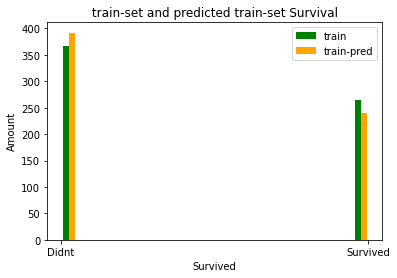

In [50]:
df_res_train=df_train_eng.copy()
df_res_train['Prediction']=y_pred.tolist()

plt.hist([df_res_train["Survived"],df_res_train["Prediction"]],bins=20,color=['green','orange'],label=['train','train-pred'])
#plt.hist(df_res["Prediction"],color=['orange'],bins=20,label=['test'])
plt.legend(loc='upper right')

plt.title(' train-set and predicted train-set Survival ')
plt.xlabel('Survived')
plt.ylabel('Amount')
plt.xticks([1,0],["Survived","Didnt"])
df_res_train.Prediction.replace({0:'Didnt',1:'Survived'},inplace=True)
df_res_train.Survived.replace({0:'Didnt',1:'Survived'},inplace=True)

df_res_train.Sex.replace({0:'Female',1:'Male'},inplace=True)


In [51]:
survived2_df=df_res_train.loc[df_res_train['Survived'] == 'Survived']
psurvived2_df=df_res_train.loc[df_res_train['Prediction'] == 'Survived']
print('Survived:' , survived2_df.count().Survived)
print('Prediction survived:' , psurvived2_df.count().Prediction)


survived2_df=df_res_train.loc[df_res_train['Survived'] == 'Didnt']
psurvived2_df=df_res_train.loc[df_res_train['Prediction'] == 'Didnt']
print('Didnt-survive:' , survived2_df.count().Survived)
print('Prediction Didnt-survive:' , psurvived2_df.count().Prediction)


Survived: 265
Prediction survived: 240
Didnt-survive: 367
Prediction Didnt-survive: 392


## Part 4 - Apply on test and show model performance estimation

In [52]:
res_dup2= count_duplicatives(df_test, col_name=None)
print(res_dup2)

12


In [53]:
df_test_eng=remove_duplicatives(df_test, col_name=None)
df_test_eng.shape
df_test_eng

(167, 8)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000,0,0,7.050,0,0
1,3,1,30.000,0,0,7.250,0,0
2,3,1,29.699,0,0,14.500,0,0
3,3,0,21.000,0,0,7.750,2,0
4,3,1,32.000,0,0,56.496,0,1
...,...,...,...,...,...,...,...,...
174,3,1,29.000,0,0,7.750,2,1
175,3,0,45.000,0,1,14.454,1,0
176,2,1,23.000,0,0,13.000,0,0
177,3,1,40.000,1,4,27.900,0,0


In [54]:
Xt = df_test_eng.drop("Survived",axis=1)
yt = df_test_eng.Survived

In [55]:
grid_search = GridSearchCV(estimator=RandFormodel, param_grid=param_grid_randfor, cv=5, scoring='accuracy', verbose=2)


grid_search.fit(Xt, yt)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")


yt_pred = grid_search.predict(Xt)
y_test = yt

#Print classification report
print(classification_report(y_test, yt_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_spl

[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_d

[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END criterio

[CV] END criterion=entropy, max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=50; total time=   0.0s

[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_split=20, n_estimators=10; total time=   

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

Best parameters found: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy: 0.8381461675579323
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       107
           1       0.96      0.78      0.86        60

    accuracy                           0.91       167
   macro avg       0.92      0.88      0.90       167
weighted avg       0.91      0.91      0.91       167



In [56]:
df_res=df_test_eng.copy()
df_res['Prediction']=yt_pred.tolist()

(array([[107.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  60.],
        [118.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  49.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

Text(0.5, 1.0, ' test-set and predicted test-set Survival ')

Text(0.5, 0, 'Survived')

Text(0, 0.5, 'Amount')

([<matplotlib.axis.XTick at 0x20155497970>,
 [Text(1, 0, 'Survived'), Text(0, 0, 'Didnt')])

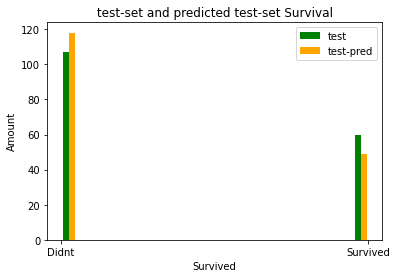

In [57]:
plt.hist([df_res["Survived"],df_res["Prediction"]],bins=20,color=['green','orange'],label=['test','test-pred'])
plt.legend(loc='upper right')

plt.title(' test-set and predicted test-set Survival ')
plt.xlabel('Survived')
plt.ylabel('Amount')
plt.xticks([1,0],["Survived","Didnt"])
df_res.Prediction.replace({0:'Didnt',1:'Survived'},inplace=True)
df_res.Survived.replace({0:'Didnt',1:'Survived'},inplace=True)

df_res.Sex.replace({0:'Female',1:'Male'},inplace=True)

In [60]:
survived3_df=df_res.loc[df_res['Survived'] == 'Survived']
psurvived3_df=df_res.loc[df_res['Prediction'] == 'Survived']
print('survived:' , survived3_df.count().Survived)
print('Prediction survived:' , psurvived3_df.count().Prediction)



survived3_df=df_res.loc[df_res['Survived'] == 'Didnt']
psurvived3_df=df_res.loc[df_res['Prediction'] == 'Didnt']
print('Didnt-survive:' , survived3_df.count().Survived)
print('Prediction Didnt-survive:' , psurvived3_df.count().Prediction)


survived: 60
Prediction survived: 49
Didnt-survive: 107
Prediction Didnt-survive: 118


In [62]:
df_res.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Prediction
0,3,Male,35.000,0,0,7.050,0,Didnt,Didnt
1,3,Male,30.000,0,0,7.250,0,Didnt,Didnt
2,3,Male,29.699,0,0,14.500,0,Didnt,Didnt
3,3,Female,21.000,0,0,7.750,2,Didnt,Survived
4,3,Male,32.000,0,0,56.496,0,Survived,Survived
5,1,Male,17.000,0,2,110.883,1,Survived,Survived
6,3,Female,21.000,1,0,9.825,0,Didnt,Didnt
7,3,Male,9.000,5,2,46.900,0,Didnt,Didnt
8,1,Female,52.000,1,0,78.267,1,Survived,Survived
9,3,Male,29.699,8,2,69.550,0,Didnt,Didnt
